可以通过将层地列表传递给Sequential的构造函数，来创建一个Sequential模型

In [ ]:
from keras.model import Sequential
from keras.layer import Denese,Activation
model=Sequential([
    Dense(32,input_shape(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

也可以使用.add()方法将各层添加到模型中

In [ ]:
model=Sequential
model.add(Dense(32,input_dim=784))
model.add(Activation('relu'))

传递一个 input_shape 参数给第一层。它是一个表示尺寸的元组 (一个整数或 None 的元组，其中 None 表示可能为任何正整数)。在 input_shape 中不包含数据的 batch 大小。

某些 2D 层，例如 Dense，支持通过参数 input_dim 指定输入尺寸，某些 3D 时序层支持  input_dim 和 input_length 参数。

如果你需要为你的输入指定一个固定的 batch 大小（这对 stateful RNNs 很有用），你可以传递一个 batch_size 参数给一个层。如果你同时将 batch_size=32 和 input_shape=(6, 8) 传递给一个层，那么每一批输入的尺寸就为 (32，6，8)。

下面的代码等价

In [ ]:
mdoel=Sequential()
model.add(Dense(32,input_shape=（784，))

In [ ]:
model=Sequential()
model.add(Dense(32,imput_dim=784))

在训练模型之前，需要配置学习过程，这是通过compile方法完成的。它接收三个参数：

优化器 optimizer。它可以是现有优化器的字符串标识符，如 rmsprop 或 adagrad，也可以是 Optimizer 类的实例。详见：optimizers。

损失函数 loss，模型试图最小化的目标函数。它可以是现有损失函数的字符串标识符，如  categorical_crossentropy 或 mse，也可以是一个目标函数。详见：losses。

评估标准 metrics。对于任何分类问题，你都希望将其设置为 metrics = ['accuracy']。评估标准可以是现有的标准的字符串标识符，也可以是自定义的评估标准函数。

In [ ]:
#多分类问题
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#二分类问题
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#均方误差回归问题
model.compile(optimizer='rmsprop',
             loss='mse')

#自定义评估标准函数
import keras.backend as K

def mean_pred(y_true,y_pred):
    return K.mean(y_pred)

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy',mean_pred])

训练

In [ ]:
#对于具有2个类的但输入模型(二进制分类)：

model=Sequential()
model.add(Dense(32,activation='relu',input_dim=100))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

#生成虚拟数据
import numpy as np
data=np.random.random((1000,100))
labels=np.random.randint(2,size=(1000,1))

#训练模型，以32个样本为一个batch进行迭代
model.fit(data,labels,epochs=10,batch_size=32)

# 基于多层感知器 (MLP) 的 softmax 多分类

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from kereas.optimizers import SGD

#生成虚拟数据
import numpy as np
x_train=np.random.random((1000,20))
y_train=keras.utils.to_categrical(np.random.randint(10,size=(1000,1)),num_classes=10)
x_test=np.random.random((100,20))
y_test=keras.units.tocategorical(np.random.randint(10,size=(100,1)),num_classes=10)

model=Sequential()
# Dense(64) 是一个具有 64 个隐藏神经元的全连接层。
# 在第一层必须指定所期望的输入数据尺寸：
# 在这里，是一个 20 维的向量。
model.add(Dense(64,activation='relu',input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

sgd=SGD(lr=0.01,decay=1e-6,momentum=0.9,nesterov=True)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

model.fit(x_train,y_train,
         epochs=20,
         batch_size=128)
score=model.evaluate(x_test,y_test,batch_size=128)

# 基于多层感知器的二分类

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout

#生成虚拟数据
x_train=np.random.random((1000,20))
y_train=np.random.randint(2,size=(1000,1))
x_test=np.random.random((100,20))
y_test=np.random.randint(2,size=(100,1))

model=Sequential()
model.add(Dense(64,input_dim=20,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

model.fit(x_train,y_train,
             epochs=20,
             batch_size=128)
score-model.evaluate(x_test,y_test,batch_size=128)

# 类似 VGG 的卷积神经网络

In [ ]:
import numpy as np
import keras
from keras.model import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD

#生成虚拟数据
x_train=np.random.random((100,100,100,3))
y_train=keras.utils.to_categorical(np.random.randint(10,size=(100,1)),num_classes=10)
x_test=np,random.random((20,100,100,3))
y_test=keras.utils.to_categorical(np.random.randint(10,size=(20,1)),num_classes=10)

model=Sequential()
# 输入: 3 通道 100x100 像素图像 -> (100, 100, 3) 张量。
# 使用 32 个大小为 3x3 的卷积滤波器。
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pooling_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

sgd=SGD(lr=0.01,decay=1e-6,momentum=0.9,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd)

model.fit(x_train,y_train,batch_size=32,epochs=10)
score=model.evaluate(x_test,y_test,batch_size=32)

# 基于 LSTM 的序列分类

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import Embedding
from keras.layers import LSTM

model=Sequential()
model.add(Embedding(max_features,output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

model.fit(x_train,y_train,batch_size=16,epochs=10)
score=model.evaluate(x_test,y_test,batch_size=16)

# 基于 1D 卷积的序列分类

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import Embedding
from keras.layers import Conv1D,GlobalAveragePooling1D,MaxPooling1D

model=Sequential()
model.add(Conv1D(64,3,activation='relu',input_shape=(seq_length,100)))
model.add(Conv1D(64,3,activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128,3,activation='relu'))
model.add(Conv1D(128,3,activation='relu'))
model.add(GlobalAveragePoolong1D())
model.add(Droput(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

model.fit(x_train,y_train,batch_size=16,epochs=10)
score=model.evaluate(x_test,y_test,batch_size=16)

# 基于栈式 LSTM 的序列分类

在这个模型中，我们将 3 个 LSTM 层叠在一起，使模型能够学习更高层次的时间表示。

前两个 LSTM 返回完整的输出序列，但最后一个只返回输出序列的最后一步，从而降低了时间维度（即将输入序列转换成单个向量）。

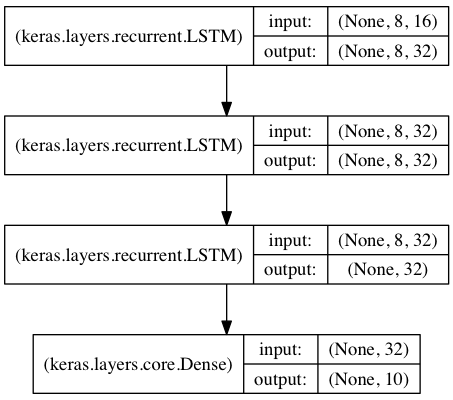

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dense
import numpy as np

data_dim=16
timesteps=8
num_classes=10

#期望输入数据尺寸: (batch_size, timesteps, data_dim)
model=Sequential()
model.add(LSTM(32,return_sequences=True,
              input_shape=(timesteps,data_dim)))#返回维度为32的向量序列
model.add(LSTM(32,return_sequences=True))#返回维度为32的向量序列
model.add(LSTM(32))#返回维度为32的单个向量
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

#生成虚拟训练数据
x_train=np.random.ranodm((1000,timesteps,data_dim))
y_train=np.random.random((1000,num_classes))

#生成虚拟验证数据
x_val=np.random.random((100,timesteps,data_dim))
y_val=np.random.random((100,num_classes))

model.fit(x_train,y_train,
         batch_size=64,epochs=5,
         validation_data=(x_val,y_val))

# 带有状态 (stateful) 的 相同的栈式 LSTM 模型

有状态的循环神经网络模型中，在一个 batch 的样本处理完成后，其内部状态（记忆）会被记录并作为下一个 batch 的样本的初始状态。这允许处理更长的序列，同时保持计算复杂度的可控性。

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dense
import numpy as np

data_dim=16
timesteps=8
num_classes=10
batch_size=32

# 期望输入数据尺寸: (batch_size, timesteps, data_dim)
# 请注意，我们必须提供完整的 batch_input_shape，因为网络是有状态的。
# 第 k 批数据的第 i 个样本是第 k-1 批数据的第 i 个样本的后续。
model=Sequential()
model.add(LSTM(32,return_sequences=True,stateful=True,
              batch_input_shape=(batch_size,timesteps,data_dim)))
model.add(LSTM(32,return_sequences=True,stateful=True))
model.add(LSTM(32,stateful=True))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

#生成虚拟训练数据
x_train=np.random.random((batch_size*10,timesteps,data_dim))
y_train=np.random.random((batch_size*10,num_classes))

#生成虚拟验证数据
x_val=np.random.random((batch_size*3,timesteps,data_dim))
y_val=np.random.random((batch_size*3,num_classes))

model.fit(x_train,y_train,
         batch_size=batch_size,epochs=5,shuffle=False,
         validation_data=(x_val,y_val))